In [396]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

### 1. Feature Selection- Dropping constant features

- In this step the features which are constant and are not important for solving the problem statement are removed.

- These often decrease the ML model's training accuracy and are not "Variant" enough.

- So these Features are determined for Variance along the rows and romoved.

In [397]:
# Make DataFrame of some sample data
data = pd.DataFrame({"A":[1,2,4,1,2,4], 
                    "B":[4,5,6,7,8,9], 
                    "C":[0,0,0,0,0,0],
                    "D":[1,1,1,1,1,1]}) 

In [398]:
data.head()

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,4,6,0,1
3,1,7,0,1
4,2,8,0,1


##### Variance Threshold
Feature selector that removes all low-variance features.

This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [399]:
# Detects zero variance features

var_thres = VarianceThreshold(threshold=0)      # Removes Zero Variance features.
var_thres.fit(data)

VarianceThreshold(threshold=0)

In [400]:
var_thres.get_support()     # Non-constant features

array([ True,  True, False, False])

In [401]:
data.columns[var_thres.get_support()]       # A and B dont have zero variance.

Index(['A', 'B'], dtype='object')

In [402]:
constant_columns = [column for column in data.columns
                    if column not in data.columns[var_thres.get_support()]]

print(len(constant_columns))
for feature in constant_columns:
    print(feature)

2
C
D


In [403]:
data.drop(constant_columns, axis=1)

,A,B
0,1,4
1,2,5
2,4,6
3,1,7
4,2,8
5,4,9


#### Using on a bigger dataset
https://www.kaggle.com/c/santander-customer-satisfaction/data?select=train.csv

In [404]:
df = pd.read_csv('Datasets/santander-customer/train.csv', nrows=10000)

print(df.shape)
df.head()

(10000, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [405]:
X = df.drop(labels=['TARGET'], axis=1)
y = df['TARGET']

In [406]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['TARGET'], axis=1),
    df['TARGET'],
    test_size=0.3,
    random_state=2049
)

X_train.shape, X_test.shape

((7000, 370), (3000, 370))

#### Applying the variance threshold

In [407]:
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [408]:
var_thres.get_support()     # Non-constant features

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

**Non-constant features**

In [409]:
print(sum(var_thres.get_support()))

269


In [410]:
len(X_train.columns[var_thres.get_support()])

269

**Constant (zero) Features**

In [411]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

101


In [412]:
for column in constant_columns:
    print(column)

ind_var2_0
ind_var2
ind_var6
ind_var13_medio_0
ind_var13_medio
ind_var18_0
ind_var18
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var29
ind_var34_0
ind_var34
ind_var41
ind_var46_0
ind_var46
num_var6
num_var13_medio_0
num_var13_medio
num_var18_0
num_var18
num_var27_0
num_var28_0
num_var28
num_var27
num_var29
num_var34_0
num_var34
num_var41
num_var46_0
num_var46
saldo_var6
saldo_var13_medio
saldo_var18
saldo_var28
saldo_var27
saldo_var29
saldo_var34
saldo_var41
saldo_var46
delta_imp_amort_var18_1y3
delta_imp_amort_var34_1y3
delta_imp_reemb_var17_1y3
delta_imp_reemb_var33_1y3
delta_imp_trasp_var17_in_1y3
delta_imp_trasp_var17_out_1y3
delta_imp_trasp_var33_in_1y3
delta_imp_trasp_var33_out_1y3
delta_num_reemb_var17_1y3
delta_num_reemb_var33_1y3
delta_num_trasp_var17_in_1y3
delta_num_trasp_var17_out_1y3
delta_num_trasp_var33_in_1y3
delta_num_trasp_var33_out_1y3
imp_amort_var18_hace3
imp_amort_var18_ult1
imp_amort_var34_hace3
imp_amort_var34_ult1
imp_aport_var33_ult1
imp_var7_emit_ult1
imp

In [413]:
X_train.drop(constant_columns, axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
7918,15959,2,26,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78044.280000
425,850,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201217.530000
3028,6095,2,26,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72774.120000
8986,18073,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78672.570000
7658,15375,2,26,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133644.960000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,530,2,28,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40853.310000
5453,10934,2,42,0.0,53.94,104.91,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62342.700000
3900,7815,2,42,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
4250,8529,2,68,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106546.080000


### 2. Feature Selection- With Correlation

In this step we will be removing the features which are highly correlated with each other.

- Features are compared with each other and if there is high correlation b/w 2 features, one is dropped and the other is kept.

In [414]:
# Loading the dataset
data = load_wine()
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]], shape=(178, 13)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [415]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df["MEDV"] = data.target
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [416]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,MEDV
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [417]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [418]:
X = df.drop("MEDV", axis=1)     # Feature Matrix
y = df["MEDV"]
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [419]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=2049
)

X_train.shape, X_test.shape

((124, 13), (54, 13))

In [420]:
X_train.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.045197,0.219739,-0.353979,0.287198,0.306344,0.247997,-0.157098,0.135024,0.539009,0.037466,0.086269,0.662878
malic_acid,0.045197,1.000000,0.210550,0.316686,-0.032569,-0.389082,-0.466990,0.333028,-0.252220,0.230856,-0.559480,-0.396876,-0.173621
ash,0.219739,0.210550,1.000000,0.384907,0.330721,0.117612,0.106158,0.103712,0.017385,0.237193,-0.062369,0.035670,0.250460
alcalinity_of_ash,-0.353979,0.316686,0.384907,1.000000,-0.140131,-0.351175,-0.384940,0.339621,-0.202953,0.006017,-0.377521,-0.293503,-0.465592
magnesium,0.287198,-0.032569,0.330721,-0.140131,1.000000,0.235795,0.210236,-0.220616,0.262691,0.221836,0.047753,0.100993,0.380470
total_phenols,0.306344,-0.389082,0.117612,-0.351175,0.235795,1.000000,0.864058,-0.556857,0.620898,-0.022082,0.432832,0.701213,0.509709
flavanoids,0.247997,-0.466990,0.106158,-0.384940,0.210236,0.864058,1.000000,-0.610653,0.659440,-0.119679,0.541292,0.800671,0.481542
nonflavanoid_phenols,-0.157098,0.333028,0.103712,0.339621,-0.220616,-0.556857,-0.610653,1.000000,-0.422299,0.106554,-0.297213,-0.584868,-0.303603
proanthocyanins,0.135024,-0.252220,0.017385,-0.202953,0.262691,0.620898,0.659440,-0.422299,1.000000,-0.021064,0.243739,0.508840,0.320236
color_intensity,0.539009,0.230856,0.237193,0.006017,0.221836,-0.022082,-0.119679,0.106554,-0.021064,1.000000,-0.458537,-0.376480,0.374372


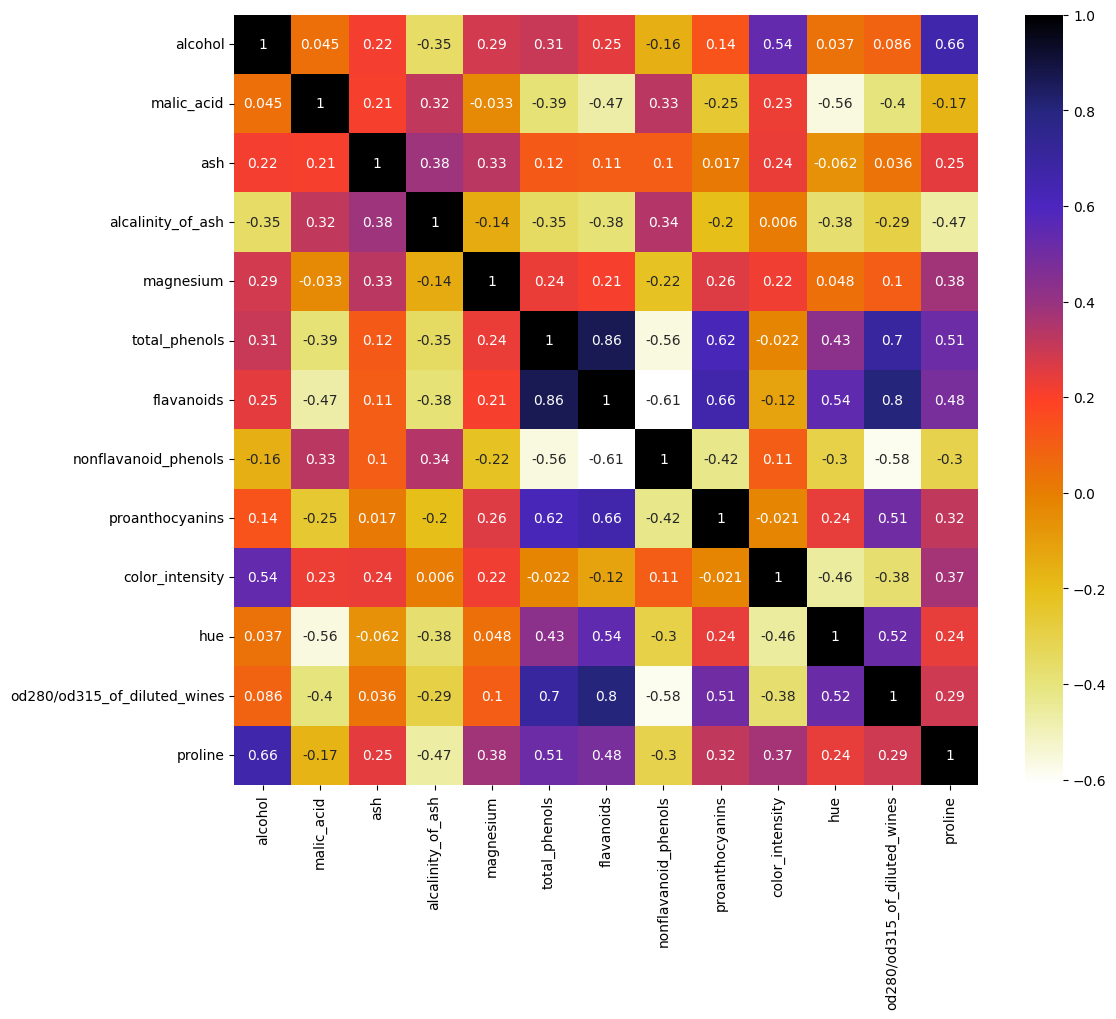

In [421]:
# Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [422]:
# This function selects the highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:     # The absolute value of the Coefficient
                colname = corr_matrix.columns[i]  # Name of the column
                col_corr.add(colname)
    return col_corr

In [423]:
corr_features = correlation(X_train, 0.7)       # Setting the Correlation Threshold to be 70%

print(len(set(corr_features)))
corr_features

2


{'flavanoids', 'od280/od315_of_diluted_wines'}

In [424]:
X_train.drop(corr_features, axis=1)
X_test.drop(corr_features, axis=1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,proline
115,11.03,1.51,2.20,21.5,85.0,2.46,0.52,2.01,1.90,1.710,407.0
10,14.10,2.16,2.30,18.0,105.0,2.95,0.22,2.38,5.75,1.250,1510.0
114,12.08,1.39,2.50,22.5,84.0,2.56,0.43,1.04,2.90,0.930,385.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.53,1.46,9.30,0.600,840.0
164,13.78,2.76,2.30,22.0,90.0,1.35,0.41,1.03,9.58,0.700,615.0
144,12.25,3.88,2.20,18.5,112.0,1.38,0.29,1.14,8.21,0.650,855.0
16,14.30,1.92,2.72,20.0,120.0,2.80,0.33,1.97,6.20,1.070,1280.0
6,14.39,1.87,2.45,14.6,96.0,2.50,0.30,1.98,5.25,1.020,1290.0
73,12.99,1.67,2.60,30.0,139.0,3.30,0.21,1.96,3.35,1.310,985.0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.56,1.35,9.20,0.610,560.0


#### Trying with a Bigger Dataset
https://www.kaggle.com/c/santander-customer-satisfaction/data?select=train.csv

In [425]:
df = pd.read_csv('Datasets/santander-customer/train.csv', nrows=10000)

X = df.drop(labels=['TARGET'], axis=1)
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['TARGET'], axis=1),
    df['TARGET'],
    test_size=0.3,
    random_state=2049
)

<Axes: >

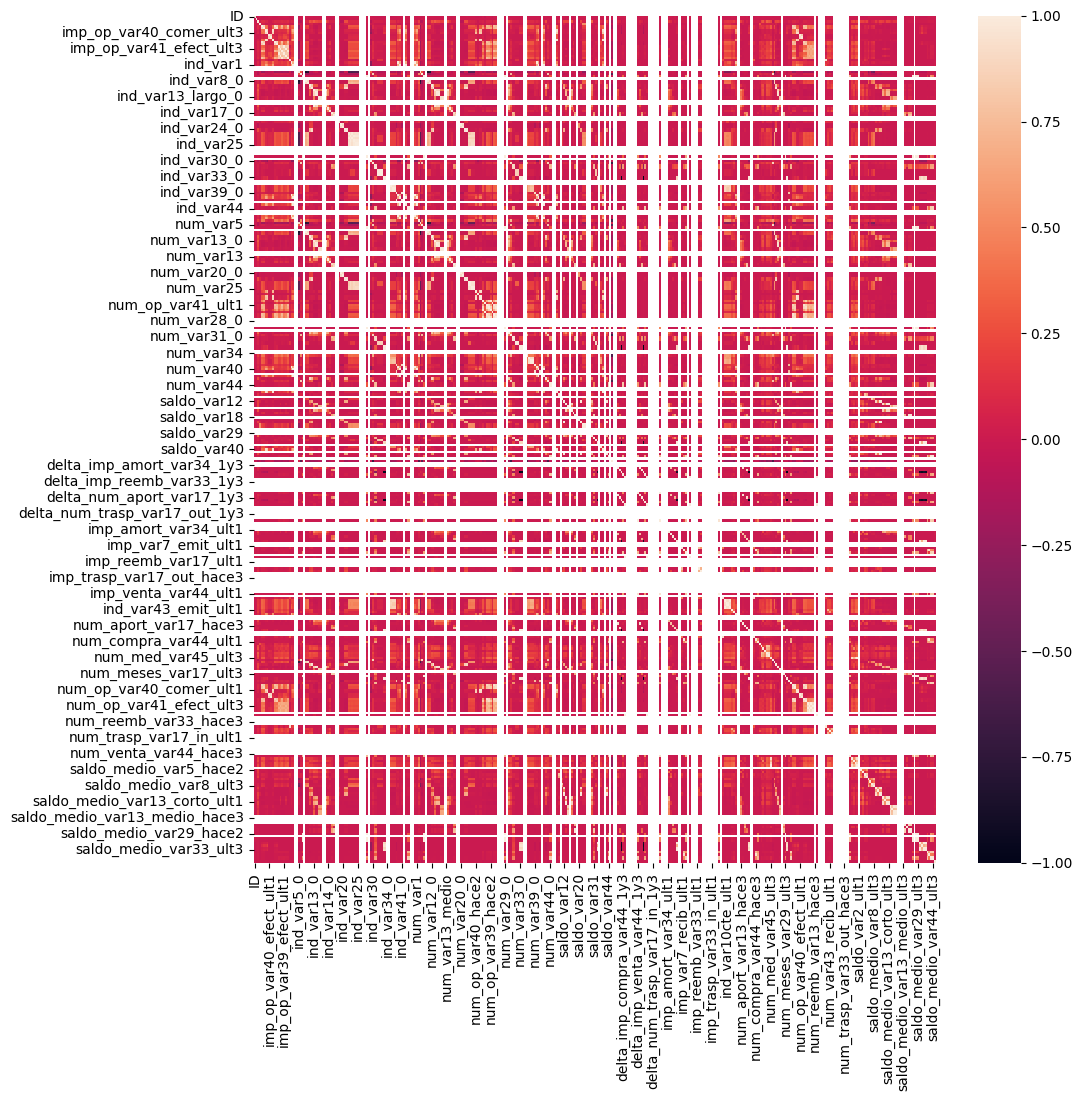

In [426]:
# Using Pearson Correlation
corr_mat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corr_mat)

In [427]:
corr_features = correlation(X_train, 0.9)

print(len(set(corr_features)))
corr_features

147


{'delta_imp_aport_var33_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var33_hace3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_reemb_var13_ult1',
 'imp_venta_var44_ult1',
 'ind_var10cte_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_largo',
 'ind_var20',
 'ind_var24',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var29_0',
 'ind_var31',
 'ind_var32',
 'ind_var32_0',
 'ind_var33',
 'ind_var37',
 'ind_var37_0',
 'ind_var39',
 'ind_var40',
 'ind_var40_0',
 'ind_var41_0',
 'ind_var44',
 'ind_var8',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'num_aport_var13_ult1',
 'num_aport_var17_ult1',
 'num_aport_var33_hace3',
 'num_compra_var44_hace3',
 'num_med_var

In [428]:
X_train.drop(corr_features, axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var41_efect_ult1,...,saldo_medio_var13_largo_hace3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var29_hace3,saldo_medio_var44_hace2,var38
7918,15959,2,26,0.0,0.00,0.00,0.0,0,0,0.0,...,0.0,0,0,0,0,0.0,0.0,0,0.0,78044.280000
425,850,2,23,0.0,0.00,0.00,0.0,0,0,0.0,...,0.0,0,0,0,0,0.0,0.0,0,0.0,201217.530000
3028,6095,2,26,0.0,0.00,0.00,0.0,0,0,0.0,...,0.0,0,0,0,0,0.0,0.0,0,0.0,72774.120000
8986,18073,2,24,0.0,0.00,0.00,0.0,0,0,0.0,...,0.0,0,0,0,0,0.0,0.0,0,0.0,78672.570000
7658,15375,2,26,0.0,0.00,0.00,0.0,0,0,0.0,...,0.0,0,0,0,0,0.0,0.0,0,0.0,133644.960000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,530,2,28,0.0,0.00,0.00,0.0,0,0,0.0,...,0.0,0,0,0,0,0.0,0.0,0,0.0,40853.310000
5453,10934,2,42,0.0,53.94,104.91,0.0,0,0,0.0,...,0.0,0,0,0,0,0.0,0.0,0,0.0,62342.700000
3900,7815,2,42,0.0,0.00,0.00,0.0,0,0,0.0,...,0.0,0,0,0,0,0.0,0.0,0,0.0,117310.979016
4250,8529,2,68,0.0,0.00,0.00,0.0,0,0,0.0,...,0.0,0,0,0,0,0.0,0.0,0,0.0,106546.080000


### 3. Feature Selection-Information gain - mutual information In Classification Problem Statements

#### Mutual Information 

Mutual information estimate for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort,

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

**I(X ; Y) = H(X) – H(X | Y)**

- I(X ; Y) is the mutual information for X and Y
- H(X) is the entropy for X and
- H(X | Y) is the conditional entropy for X given Y.

The result has the units of bits.

#### Youtube Videos

Entropy: https://www.youtube.com/watch?v=1IQOtJ4NI_0
        
Information Gain: https://www.youtube.com/watch?v=FuTRucXB9rA
        
Gini Impurity: https://www.youtube.com/watch?v=5aIFgrrTqOw

Statistical test: https://www.youtube.com/watch?v=4-rxTA_5_xA

In [429]:
df = pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [431]:
df['Wine'].unique()     # Target variable

array([1, 2, 3])

In [432]:
# Train test split to avoid overfitting

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['Wine'], axis=1),
    df['Wine'],
    test_size=0.3,
    random_state=2049
)

X_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
157,12.45,3.03,2.64,27.0,97,1.90,0.58,0.63,1.14,7.50,0.67,1.73,880
19,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845
45,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080
105,12.42,2.55,2.27,22.0,90,1.68,1.84,0.66,1.42,2.70,0.86,3.30,315
81,12.72,1.81,2.20,18.8,86,2.20,2.53,0.26,1.77,3.90,1.16,3.14,714


In [433]:
# determine the mutual information

mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.52674214, 0.30062097, 0.09424477, 0.21037067, 0.12632378,
       0.42404212, 0.71430899, 0.18030109, 0.21704665, 0.51087418,
       0.43791706, 0.50538276, 0.58133788])

In [434]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.714309
Proline                 0.581338
Alcohol                 0.526742
Color.int               0.510874
OD                      0.505383
Hue                     0.437917
Phenols                 0.424042
Malic.acid              0.300621
Proanth                 0.217047
Acl                     0.210371
Nonflavanoid.phenols    0.180301
Mg                      0.126324
Ash                     0.094245
dtype: float64

**Ordered mutual_info values per feature**

<Axes: >

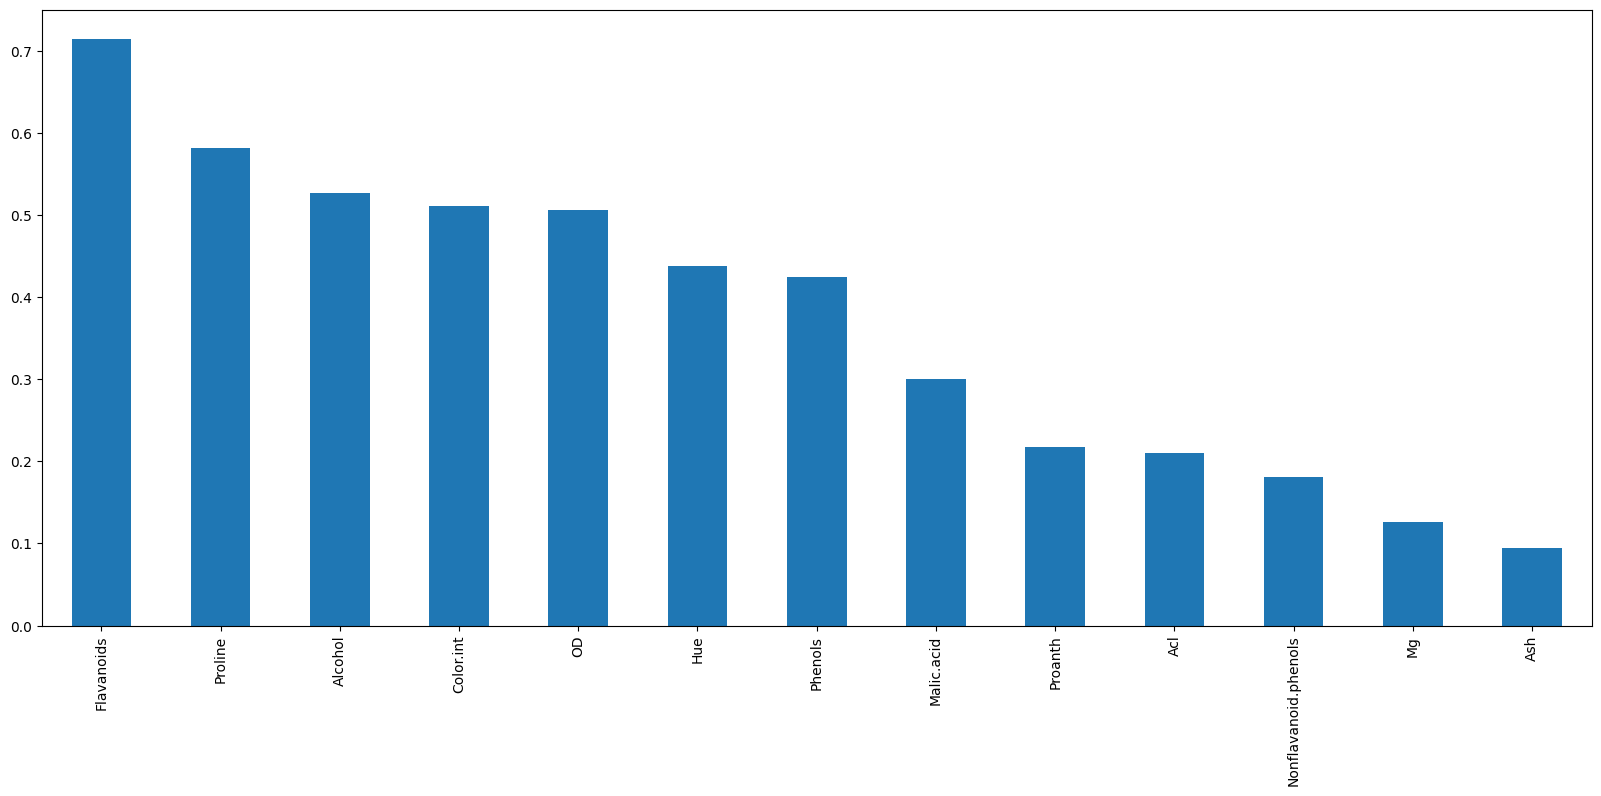

In [435]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

**Now selecting the top 5 important features**

In [436]:
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Alcohol', 'Flavanoids', 'Color.int', 'OD', 'Proline'], dtype='object')

#### Difference Between Information Gain And Mutual Information
- I(X ; Y) = H(X) – H(X | Y), and
- IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.

**Comparion of Univariate And Mutual Information**

Comparison of F-test and mutual information
https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py

### 4. Feature Selection-Information gain - mutual information In Regression Problem Statements

#### Mutual Information 
Estimate mutual information for a continuous target variable.

- Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables.
- It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances 

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

**I(X ; Y) = H(X) – H(X | Y)**

- I(X ; Y) is the mutual information for X and Y
- H(X) is the entropy for X and
- H(X | Y) is the conditional entropy for X given Y.

The result has the units of bits.

#### Youtube Videos

Entropy: https://www.youtube.com/watch?v=1IQOtJ4NI_0
        
Information Gain: https://www.youtube.com/watch?v=FuTRucXB9rA
        
Gini Impurity: https://www.youtube.com/watch?v=5aIFgrrTqOw

Statistical test: https://www.youtube.com/watch?v=4-rxTA_5_xA

https://www.youtube.com/watch?v=YrhlQB3mQFI

In [437]:
#https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

housing_df = pd.read_csv('Datasets/house-prices/train.csv')
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [438]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [439]:
housing_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [440]:
numeric_lst=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = list(housing_df.select_dtypes(include=numeric_lst).columns)

In [441]:
numerical_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [442]:
housing_df=housing_df[numerical_cols]

In [443]:
housing_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [444]:
housing_df = housing_df.drop("Id", axis=1)

In [445]:
# It is always a good practice to split train and test data to avoid overfitting

X_train, X_test, y_train, y_test = train_test_split(
    housing_df.drop(labels=['SalePrice'], axis=1),
    housing_df['SalePrice'],
    test_size=0.3,
    random_state=2049
)

X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
405,20,NaN,9991,4,4,1976,1993,0.0,1116,0,...,490,120,78,0,0,0,0,0,6,2009
1280,20,67.0,9808,7,5,2002,2002,110.0,788,0,...,544,0,72,0,0,0,0,0,3,2009
316,60,94.0,13005,7,7,1980,1980,278.0,692,0,...,484,288,195,0,0,0,0,0,8,2009
917,20,NaN,17140,4,6,1956,1956,0.0,1059,0,...,284,0,0,0,0,0,0,0,4,2009
130,60,88.0,14200,7,6,1966,1966,309.0,445,0,...,487,105,66,0,0,0,0,0,5,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,30,84.0,11340,6,5,1923,1950,0.0,0,0,...,312,0,0,228,0,0,0,0,3,2006
540,20,85.0,14601,9,5,2006,2006,584.0,1260,0,...,765,270,68,0,0,0,0,0,3,2009
1307,20,60.0,8072,5,5,1994,1995,0.0,746,0,...,480,0,64,0,0,0,0,0,5,2009
1354,60,NaN,10316,7,5,2000,2000,0.0,735,0,...,839,0,184,0,0,0,0,0,6,2008


In [446]:
X_train.isnull().sum()

MSSubClass         0
LotFrontage      182
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         3
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       48
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [447]:
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.27424764, 0.20740588, 0.16047894, 0.56369275, 0.14561801,
       0.33686981, 0.21788369, 0.1117546 , 0.1657574 , 0.01714747,
       0.1379194 , 0.39691018, 0.28878143, 0.22270355, 0.00984333,
       0.43394332, 0.02819234, 0.00406511, 0.2932092 , 0.10975924,
       0.05437014, 0.02019935, 0.18350189, 0.18780467, 0.25731325,
       0.34581461, 0.31005216, 0.10103403, 0.16214894, 0.03169881,
       0.00097969, 0.0063042 , 0.00221812, 0.        , 0.00853539,
       0.00992404])

In [448]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.563693
GrLivArea        0.433943
TotalBsmtSF      0.396910
GarageCars       0.345815
YearBuilt        0.336870
GarageArea       0.310052
FullBath         0.293209
1stFlrSF         0.288781
MSSubClass       0.274248
GarageYrBlt      0.257313
2ndFlrSF         0.222704
YearRemodAdd     0.217884
LotFrontage      0.207406
Fireplaces       0.187805
TotRmsAbvGrd     0.183502
BsmtFinSF1       0.165757
OpenPorchSF      0.162149
LotArea          0.160479
OverallCond      0.145618
BsmtUnfSF        0.137919
MasVnrArea       0.111755
HalfBath         0.109759
WoodDeckSF       0.101034
BedroomAbvGr     0.054370
EnclosedPorch    0.031699
BsmtFullBath     0.028192
KitchenAbvGr     0.020199
BsmtFinSF2       0.017147
YrSold           0.009924
LowQualFinSF     0.009843
MoSold           0.008535
ScreenPorch      0.006304
BsmtHalfBath     0.004065
PoolArea         0.002218
3SsnPorch        0.000980
MiscVal          0.000000
dtype: float64

<Axes: >

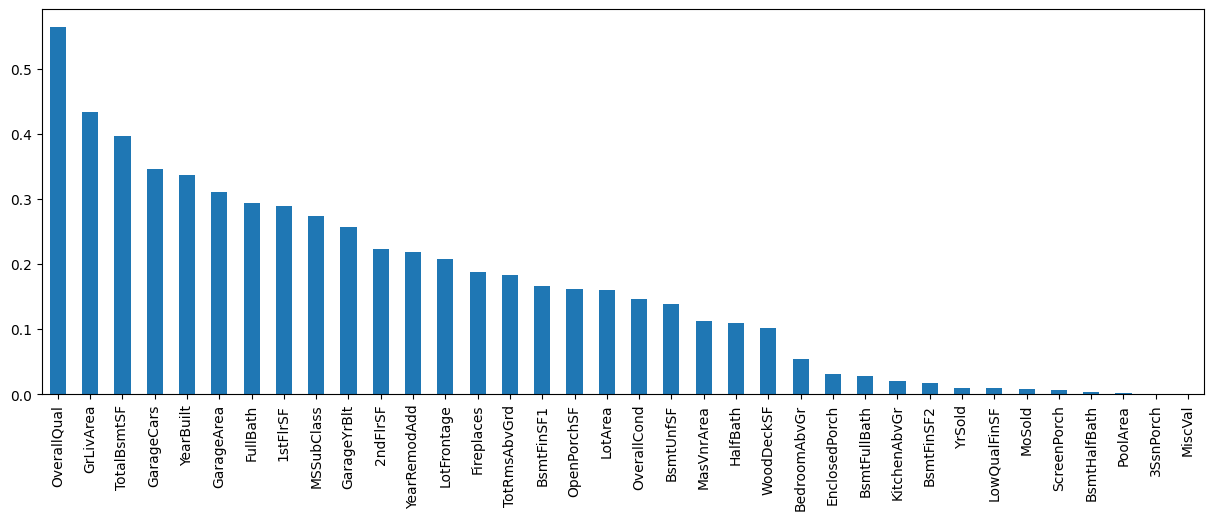

In [449]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [450]:
# Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x00000272FFA2A160>)

In [451]:
selected_top_columns.get_support()

array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
        True, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False])

In [452]:
X_train.columns[selected_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'FullBath',
       'GarageCars', 'GarageArea'],
      dtype='object')

#### Difference Between Information Gain And Mutual Information

- I(X ; Y) = H(X) – H(X | Y), and
- IG(S, a) = H(S) – H(S | a)


As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.

### 5. Fisher Score- Chisquare  Test For Feature Selection

Compute chi-squared stats between each non-negative feature and class.

- This score should be used to evaluate categorical variables in a classification task.

This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.
The Chi Square statistic is commonly used for testing relationships between categorical variables.

It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories.

#### Youtube Videos

Statistical test: https://www.youtube.com/watch?v=4-rxTA_5_xA

https://www.youtube.com/watch?v=YrhlQB3mQFI

In [453]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [455]:
df=df[['sex','embarked','alone','pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [456]:
df['sex'] = np.where(df['sex']=="male", 1, 0)
df.head()

,sex,embarked,alone,pclass,survived
0,1,S,False,3,0
1,0,C,False,1,1
2,0,S,True,3,1
3,0,S,False,1,1
4,1,S,True,3,0


In [457]:
# Perform label encoding on embarked
ordinal_label = {k: i for i, k in enumerate(df['embarked'].unique(), 0)}
df['embarked'] = df['embarked'].map(ordinal_label)

df.head()

,sex,embarked,alone,pclass,survived
0,1,0,False,3,0
1,0,1,False,1,1
2,0,0,True,3,1
3,0,0,False,1,1
4,1,0,True,3,0


In [458]:
### let's perform label encoding on alone
df['alone'] = np.where(df['alone']==True, 1, 0)

df.head()

,sex,embarked,alone,pclass,survived
0,1,0,0,3,0
1,0,1,0,1,1
2,0,0,1,3,1
3,0,0,0,1,1
4,1,0,1,3,0


In [459]:
# Train-Test split is usually done to avaoid overfitting
X_train, X_test, y_train, y_test = train_test_split(
    df[['sex','embarked','alone','pclass']],
    df['survived'],
    test_size=0.3,
    random_state=2049
)

X_train.head()

,sex,embarked,alone,pclass
560,1,2,1,3
671,1,0,0,1
854,0,0,0,2
194,0,1,1,1
379,1,0,1,3


In [460]:
X_train['sex'].unique()

array([1, 0])

In [461]:
X_train.isnull().sum()

sex         0
embarked    0
alone       0
pclass      0
dtype: int64

In [ ]:
# Perform chi2 test. chi2 returns 2 values - Fscore and Pvalue

f_p_values = chi2(X_train, y_train)

In [463]:
f_p_values

(array([73.97962761,  9.54189904,  9.73764631, 22.91432306]),
 array([7.89274007e-18, 2.00833842e-03, 1.80531917e-03, 1.69384977e-06]))

In [464]:
p_values = pd.Series(f_p_values[1])
p_values.index = X_train.columns
p_values

sex         7.892740e-18
embarked    2.008338e-03
alone       1.805319e-03
pclass      1.693850e-06
dtype: float64

In [465]:
p_values.sort_index(ascending=False)

sex         7.892740e-18
pclass      1.693850e-06
embarked    2.008338e-03
alone       1.805319e-03
dtype: float64

#### Observation 
Sex Column is the most important column when compared to the output feature
Survived